# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample



In [ ]:
from datetime import datetime

In [ ]:
file_path = 'SHS_JRU_DATASET_24-25.xlsx'
df_raw = pd.read_excel(file_path, sheet_name='Table001 (Page 1-39)')


In [ ]:
df.head()
df.info()
df.dtypes
df.head()
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student         5000 non-null   int64  
 1   yearlevel       5000 non-null   int64  
 2   section         5000 non-null   object 
 3   birthdate       5000 non-null   object 
 4   gender          5000 non-null   object 
 5   dateenrolled    5000 non-null   object 
 6   age             5000 non-null   float64
 7   gender_encoded  5000 non-null   int64  
 8   strand          5000 non-null   object 
 9   strand_gender   5000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 390.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student         5000 non-null   int64  
 1   yearlevel       5000 non-null   int64  
 2

,0
student,int64
yearlevel,int64
section,object
birthdate,object
gender,object
dateenrolled,object
age,float64
gender_encoded,int64
strand,object
strand_gender,object


 ## Check for Duplicate rows

In [ ]:
print("Duplicate rows:", df_raw.duplicated().sum())

Duplicate rows: 0


## Check missing values

In [ ]:

print("\nMissing values per column:")
print(df_raw.isnull().sum())


Missing values per column:
Student          0
YearLevel        0
Strand           0
Section          0
Birthdate       18
Gender           3
DateEnrolled     0
dtype: int64


In [ ]:
df_cleaned = df.dropna()

print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

NameError: name 'df' is not defined

## Basic description (summary statistics)

In [ ]:

print("\nDataset description:")
print(df_raw.describe(include='all'))


Dataset description:
            Student    YearLevel    Strand Section     Birthdate  Gender  \
count   1990.000000  1990.000000      1990    1990   1972.000000    1987   
unique          NaN          NaN         9      40           NaN       2   
top             NaN          NaN  SHS-STEM    ST-D           NaN  FEMALE   
freq            NaN          NaN       927      82           NaN    1093   
mean     995.500000     1.533166       NaN     NaN  39265.500000     NaN   
std      574.607837     0.499024       NaN     NaN    495.338222     NaN   
min        1.000000     1.000000       NaN     NaN  35529.000000     NaN   
25%      498.250000     1.000000       NaN     NaN  39067.000000     NaN   
50%      995.500000     2.000000       NaN     NaN  39289.000000     NaN   
75%     1492.750000     2.000000       NaN     NaN  39495.000000     NaN   
max     1990.000000     2.000000       NaN     NaN  45507.000000     NaN   

        DateEnrolled  
count    1990.000000  
unique           Na

## CHECKING THE COUNT AND VALUE OF RECORDS PER CATEGORY

In [ ]:
df.value_counts()

,,,,,,,,,count
student,yearlevel,strand,section,birthdate,gender,dateenrolled,age,gender_encoded,
1990,1.0,SHS-TG,TG-A,2007-05-25,FEMALE,2024-12-17,0.333333,0,1
1,0.0,SHS-ABM,ABM-C,2008-04-04,FEMALE,2024-12-18,0.333333,0,1
2,0.0,SHS-ABM,ABM-B,2008-01-15,MALE,2024-12-20,0.333333,1,1
3,0.0,SHS-ABM,ABM-D,2008-06-22,MALE,2025-01-07,0.000000,1,1
4,0.0,SHS-ABM,ABM-B,2008-02-10,FEMALE,2024-12-05,0.333333,0,1
...,...,...,...,...,...,...,...,...,...
16,0.0,SHS-ABM,ABM-A,2008-09-29,FEMALE,2025-01-06,0.000000,0,1
15,0.0,SHS-ABM,ABM-A,2007-06-27,MALE,2025-01-07,0.333333,1,1
14,0.0,SHS-ABM,ABM-C,2008-01-29,MALE,2024-12-19,0.333333,1,1


## Value counts for Gender and Strand

In [ ]:
# 4. Value counts for Gender and Strand
print("\nGender distribution:")
print(df_raw['Gender'].value_counts(dropna=False))


Gender distribution:
Gender
FEMALE    1093
MALE       894
NaN          3
Name: count, dtype: int64


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
print("\nStrand distribution:")
print(df_raw['Strand'].value_counts(dropna=False))


Strand distribution:
Strand
SHS-STEM     927
SHS-HSSGA    332
SHS-ABM      293
SHS-AD       138
SHS-CHSS      89
SHS-FB        83
SHS-SP        50
SHS-TG        44
SHS-AN        34
Name: count, dtype: int64


## Strand Distribution

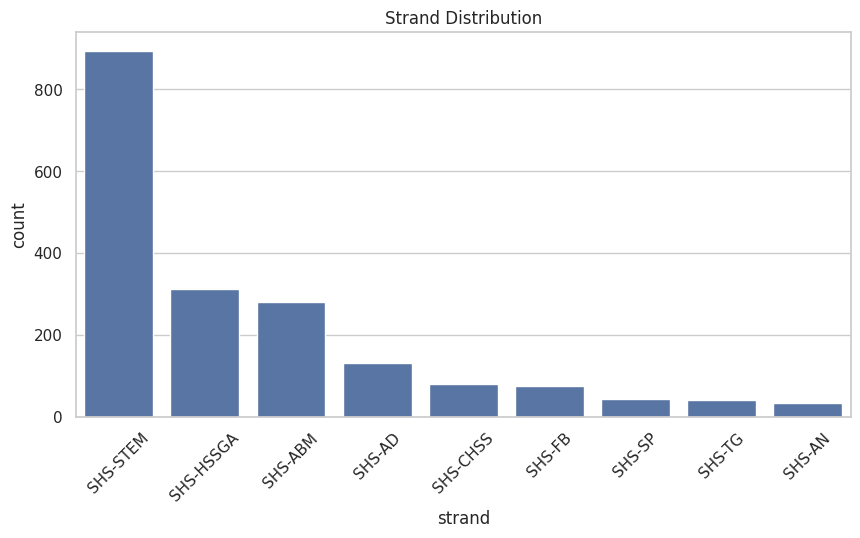

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='strand', order=df['strand'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Strand Distribution')
plt.show()



Balanced Strand Distribution:
strand
SHS-FB       569
SHS-STEM     564
SHS-HSSGA    562
SHS-CHSS     562
SHS-SP       560
SHS-AD       550
SHS-AN       546
SHS-ABM      544
SHS-TG       543
Name: count, dtype: int64


Text(0.5, 1.0, 'Balanced Strand Distribution After Oversampling and Downsampling')

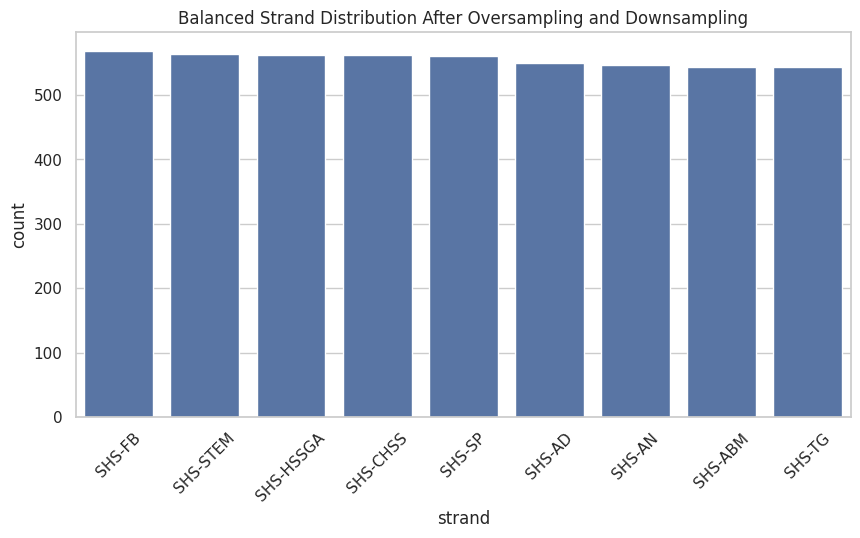

In [ ]:

# Step 1: Split the dataset into features (X) and target (y)
X_features = df.drop(columns='strand')
y_target = df['strand']

# Step 2: Apply RandomOverSampler to create a balanced dataset
oversample_technique = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample_technique.fit_resample(X_features, y_target)

# Step 3: Combine the resampled features and target into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X_features.columns)
df_resampled['strand'] = y_resampled

# (Optional) Step 4: Downsample the resampled dataset to a fixed number (e.g., 10,000 rows)
# Remove this step if you want to keep all oversampled data
df_downsampled = resample(df_resampled, replace=False, n_samples=5000, random_state=42)

# Step 5: Check the distribution of the classes in the final balanced dataset
print("Balanced Strand Distribution:")
print(df_downsampled['strand'].value_counts())

# (Optional) Step 6: Visualize the balanced strand distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df_downsampled, x='strand', order=df_downsampled['strand'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Balanced Strand Distribution After Oversampling and Downsampling')


## Gender Distribution

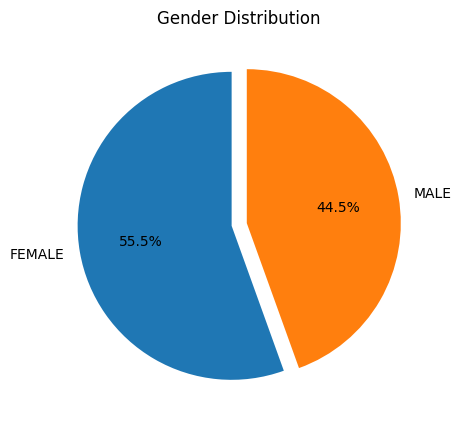

In [ ]:
plt.figure(figsize=(5,5))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.05,0.05])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

## Checking Outliers

In [ ]:

columns = ['age' 'strand' 'gender']

# Loop through each column
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nColumn: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(outliers[[col]])

    # Visualize outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} with Outliers')
    plt.show()


NameError: name 'df' is not defined

In [ ]:
df_balanced = df_downsampled

In [ ]:
df_balanced

,student,yearlevel,section,birthdate,gender,dateenrolled,age,gender_encoded,strand
2748,151,0.0,AAD-B,2007-04-22,FEMALE,2024-12-27,0.666667,0,SHS-AD
6273,459,0.0,HG-C,2008-02-11,MALE,2024-12-20,0.333333,1,SHS-HSSGA
2034,125,0.0,ABM-C,2008-09-23,FEMALE,2024-12-18,0.000000,0,SHS-ABM
5927,348,0.0,HG-D,2008-11-25,MALE,2024-12-16,0.000000,1,SHS-HSSGA
3340,1158,1.0,ANIMATION-A,2006-10-28,FEMALE,2025-01-07,0.666667,0,SHS-AN
...,...,...,...,...,...,...,...,...,...
1836,1926,1.0,ST-I,2007-02-26,FEMALE,2024-12-16,0.666667,0,SHS-STEM
1019,1062,1.0,ABM-A,2007-08-22,MALE,2024-12-16,0.333333,1,SHS-ABM
1326,1394,1.0,HG-B,2007-02-16,FEMALE,2024-12-12,0.666667,0,SHS-HSSGA
6442,475,0.0,SPORTS-A,2007-07-26,MALE,2025-01-13,0.333333,1,SHS-SP


In [ ]:
df_balanced.shape
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2748 to 475
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   student         5000 non-null   int64         
 1   yearlevel       5000 non-null   float64       
 2   section         5000 non-null   object        
 3   birthdate       5000 non-null   datetime64[ns]
 4   gender          5000 non-null   object        
 5   dateenrolled    5000 non-null   datetime64[ns]
 6   age             5000 non-null   float64       
 7   gender_encoded  5000 non-null   int64         
 8   strand          5000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 390.6+ KB


In [ ]:
df_balanced.to_csv("SHS_JRU_DATASET_24-25_clean.csv", index=False)

In [ ]:
from google.colab import files
files.download("SHS_JRU_DATASET_24-25_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# MLP

## MLP CODE EXPLANATION

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 pandas as pd

- Used for loading and manipulating tabular data in DataFrames.

numpy as np

- Enables efficient numerical operations and array handling.

from sklearn.neural_network import MLPClassifier

- Provides the Multilayer Perceptron (MLP) classifier for supervised machine learning tasks.

from sklearn.model_selection import train_test_split

- Splits the dataset into training and testing subsets to evaluate model performance fairly.

from sklearn.preprocessing import StandardScaler

- Scales features to have zero mean and unit variance, which helps stabilize neural network training.

from sklearn.metrics import classification_report, confusion_matrix, f1_score

- classification_report: Summarizes precision, recall, and F1-score.


- confusion_matrix: Visualizes prediction accuracy across classes.


- f1_score: Computes the harmonic mean of precision and recall.

import matplotlib.pyplot as plt
- Used for creating static visualizations such as performance plots and accuracy curves.

import seaborn as sns
- Enhances visualizations with aesthetically pleasing and informative statistical graphics (e.g., heatmaps).



In [ ]:
# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

`df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')`
This line loads a cleaned dataset from a CSV file into a pandas DataFrame called df. The dataset is assumed to contain student-related information such as strand and gender.

`df['gender'] = df['gender'].str.strip().str.capitalize()`
This line cleans the values in the 'gender' column. It removes any leading or trailing whitespace using .strip() and ensures the first letter is capitalized (e.g., 'male' becomes 'Male'). This step helps maintain consistency in categorical data, which is crucial for downstream processing or model training.

`df['strand_gender'] = df['strand'] + "_" + df['gender']`
This line creates a new column named 'strand_gender' by concatenating the values from the 'strand' and 'gender' columns, separated by an underscore (e.g., 'STEM' and 'Male' become 'STEM_Male'). This combined label is often used as a multi-class target variable in classification tasks, enabling the model to learn both strand and gender distinctions simultaneously.

In [ ]:
# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

This code is preparing the data for machine learning by separating it into features (X) and a target variable (y), which is a standard practice before model training.

In [ ]:
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

This line identifies columns in the feature set X that are either of type object or category — typically representing categorical or text-based data. These columns must be converted into numeric format before training a machine learning model.

In [ ]:
X = pd.get_dummies(X, columns=non_numeric_cols)

Applies one-hot encoding to the identified non-numeric columns. This process converts each categorical variable into multiple binary (0/1) columns, enabling the model to interpret these features correctly.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

- random_state=0 ensures reproducibility.

- stratify=y maintains the same distribution of the target classes in both training and testing sets, which is especially important for classification tasks involving imbalanced classes.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- StandardScaler() standardizes the features by removing the mean and scaling to unit variance.

- scaler.fit_transform(X_train):

-  Fits the scaler on the training data (computes the mean and standard deviation).

- Transforms the training data to a standardized format.

- scaler.transform(X_test):

- Applies the same scaling (based on the training data) to the test set, ensuring consistency.

In [ ]:
# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[100,100,100], solver='lbfgs', max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

- MLPClassifier: This is the Multilayer Perceptron (MLP) model from scikit-learn, which is a type of neural network used for classification.

- hidden_layer_sizes=[100,100,100]: Defines the architecture of the neural network, specifically the number and size of hidden layers. In this case, the network has 3 hidden layers with 100 neurons each.

- solver='lbfgs': Specifies the optimization algorithm used to minimize the loss function. The 'lbfgs' solver is a quasi-Newton method known for its efficiency in handling smaller datasets or well-behaved models.

- max_iter=1000: Sets the maximum number of iterations the solver can run for, allowing the model more time to converge if needed.

- random_state=0: Ensures that the results are reproducible by fixing the random seed used in initializing the weights.

`nnclf.fit(X_train, y_train)`

- This line trains the model (nnclf) on the training data (X_train) and the target labels (y_train).

- The model will use the training data to learn the relationships between the features (X_train) and the target variable (y_train), adjusting its weights to minimize the loss function.

In [ ]:
# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

After training the Multilayer Perceptron (MLP) classifier, predictions are made on the test dataset to assess the model’s performance. The predict_proba method is used to retrieve the predicted probability distribution for the first test sample, offering insight into the model’s confidence in each class. The predict method is then applied to the first five samples to showcase the actual predicted classes. These preliminary predictions help illustrate how the model is functioning on unseen data.

To quantitatively evaluate the classifier, several key metrics are calculated. The score method is used on both the training and test sets to compute the model's accuracy—defined as the proportion of correct predictions. Additionally, the f1_score with average='weighted' is used to assess the balance between precision and recall across all classes, which is especially important in multi-class classification tasks like strand-gender prediction. The model’s performance is then summarized using the classification_report, which provides detailed precision, recall, and F1-score values for each class, allowing deeper analysis of which categories the model predicts most reliably.

A confusion matrix is generated using the confusion_matrix function, showing the distribution of true versus predicted class labels. This matrix offers a clear visual summary of classification accuracy across all categories, making it easier to spot misclassifications or class imbalances. Overall, this block of code performs a thorough evaluation of the MLP model’s performance, using both numerical metrics and diagnostic tools to ensure robust and interpretable results.

In [ ]:
# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")

The first part of this block visualizes the model’s performance through a confusion matrix heatmap. Using seaborn and matplotlib, the confusion matrix (cm_combined) is plotted with color-coded cells that make it easier to interpret model accuracy across all class combinations. Labels on both axes represent the unique values of the combined strand_gender target, showing how many times each class was correctly predicted or misclassified. This visualization is crucial for identifying patterns in misclassifications, such as whether certain strands or genders are being confused more frequently than others.

Following the visualization, the code provides a summary of student distribution by strand and gender. Using a group-by operation on the original dataset (df), the script counts the number of male and female students within each strand, then prints these in a structured format. This breakdown is helpful not only for understanding the dataset's class balance but also for providing context to the model’s performance—particularly if certain classes are underrepresented and thus harder to predict.

This block complements the numerical performance evaluation by offering a visual and demographic perspective. The heatmap gives a quick glance at where the model performs well or poorly, while the gender-strand counts help frame the data's structure, supporting deeper analysis and interpretation of model behavior.

## MLP HIDDEN LAYERS - BEST MODEL - EXPERIMENT 3

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[9.14409229e-08 3.16361810e-11 3.78702071e-19 3.30012838e-22
  1.08713386e-11 2.81727924e-42 2.99283458e-12 5.16920333e-35
  5.13274690e-41 3.86262251e-39 8.54482880e-09 5.41368057e-17
  1.05248179e-28 2.98927809e-42 1.13047529e-05 9.99988595e-01
  7.61280344e-48 1.01792578e-28]]
Prediction Results:  ['SHS-STEM_Male' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9336

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.89      0.79      0.84        78
    SHS-ABM_Male       0.89      0.93      0.91        58
   SHS-AD_Female       0.94      1.00      0.97       100
     SHS-AD_Male       0.95      0.95      0.95        37
   SHS-AN_Female       0.97      1.00      0.99        69
     SHS-AN_Male       0.99      1.00      0.99        68
 SHS-CHSS_Female       

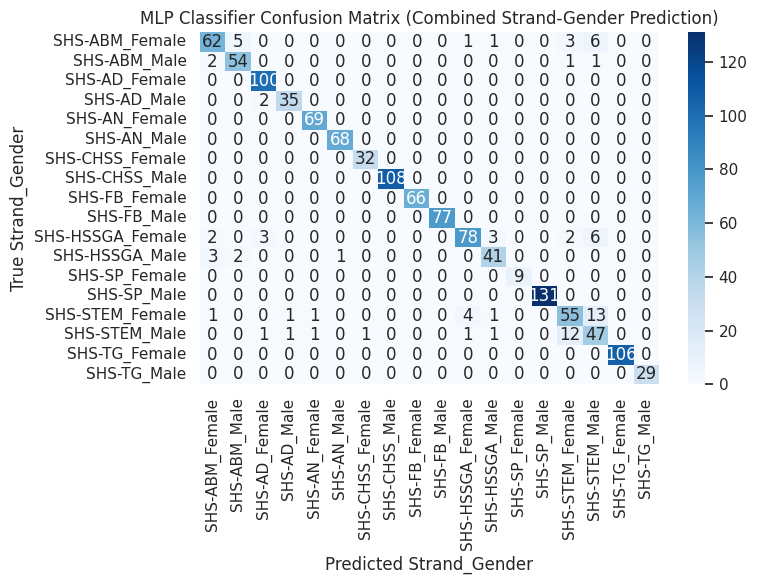


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[100,100,100], solver='lbfgs', max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


##MLP NEURON LAYERS - BEST MODEL - EXPERIMENT 10

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[4.04849578e-046 1.00000000e+000 1.27757101e-189 9.40238872e-066
  2.51675677e-184 9.20210345e-161 6.87565967e-132 1.40044792e-146
  8.01810113e-154 4.25389793e-169 2.85329930e-085 2.05450281e-027
  5.22947015e-197 8.81739865e-254 1.93173367e-028 7.80444221e-013
  1.06718180e-321 5.35404353e-185]]
Prediction Results:  ['SHS-ABM_Male' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9488

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.86      0.81      0.83        78
    SHS-ABM_Male       0.85      0.95      0.89        58
   SHS-AD_Female       0.97      1.00      0.99       100
     SHS-AD_Male       0.93      1.00      0.96        37
   SHS-AN_Female       0.88      1.00      0.94        69
     SHS-AN_Male       1.00      1.00      1.00        68
 SHS-C

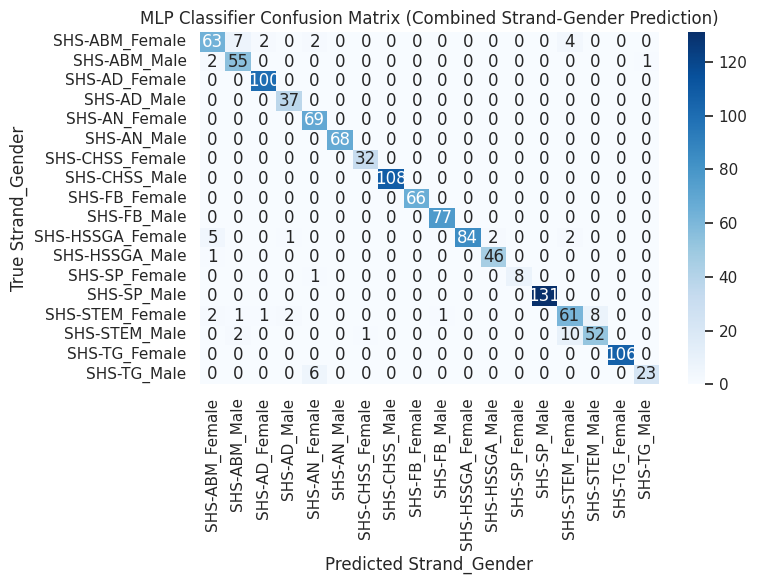


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[10,100], solver='lbfgs', max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


## MLP ACTIVATION FUNCTION - BEST MODEL 'tanh' - EXPERIMENT 25

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[9.99997042e-01 2.95782551e-06 9.02509174e-16 6.01991090e-14
  9.23367785e-15 1.55508463e-24 3.37022773e-25 9.09450883e-38
  3.41650311e-21 5.35173680e-20 4.82524466e-14 2.52386115e-18
  1.45307855e-11 1.15507419e-17 5.01807520e-13 4.78839959e-20
  8.00933319e-12 4.69327093e-27]]
Prediction Results:  ['SHS-ABM_Female' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9536

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.98      0.82      0.90        78
    SHS-ABM_Male       0.90      0.97      0.93        58
   SHS-AD_Female       0.97      1.00      0.99       100
     SHS-AD_Male       0.93      1.00      0.96        37
   SHS-AN_Female       0.97      1.00      0.99        69
     SHS-AN_Male       1.00      1.00      1.00        68
 SHS-CHSS_Female      

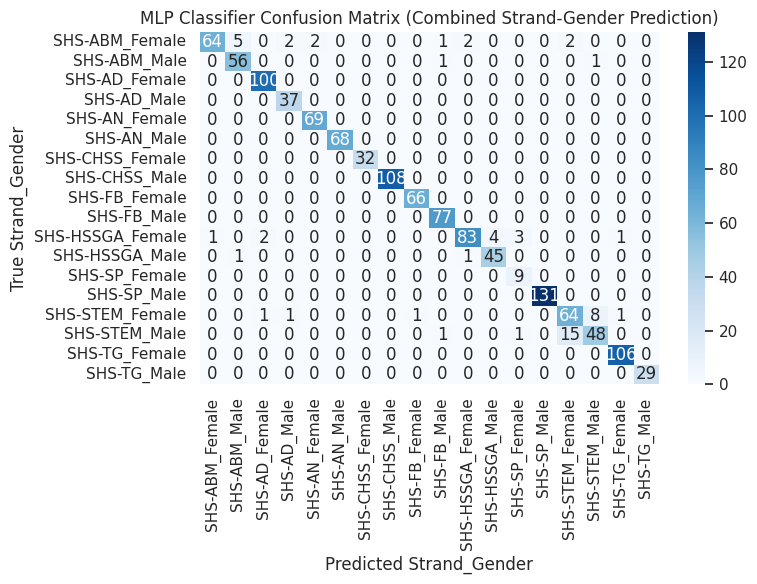


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[10,75], solver='lbfgs',activation='tanh',max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


## MLP ACTIVATION FUNCTION - BEST MODEL 'relu' - EXPERIMENT 30

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[2.57583009e-019 4.69902317e-048 3.74013577e-196 6.41596881e-134
  4.45315124e-277 1.15137908e-201 5.32322785e-138 1.40321471e-271
  1.69809474e-204 1.50279827e-248 1.22651935e-080 9.68058814e-094
  1.57421303e-195 0.00000000e+000 1.00000000e+000 4.26650619e-086
  7.18599757e-180 4.45645108e-284]]
Prediction Results:  ['SHS-STEM_Female' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9432

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.97      0.85      0.90        78
    SHS-ABM_Male       1.00      0.97      0.98        58
   SHS-AD_Female       0.98      1.00      0.99       100
     SHS-AD_Male       0.92      0.95      0.93        37
   SHS-AN_Female       0.97      1.00      0.99        69
     SHS-AN_Male       0.97      1.00      0.99        68
 SH

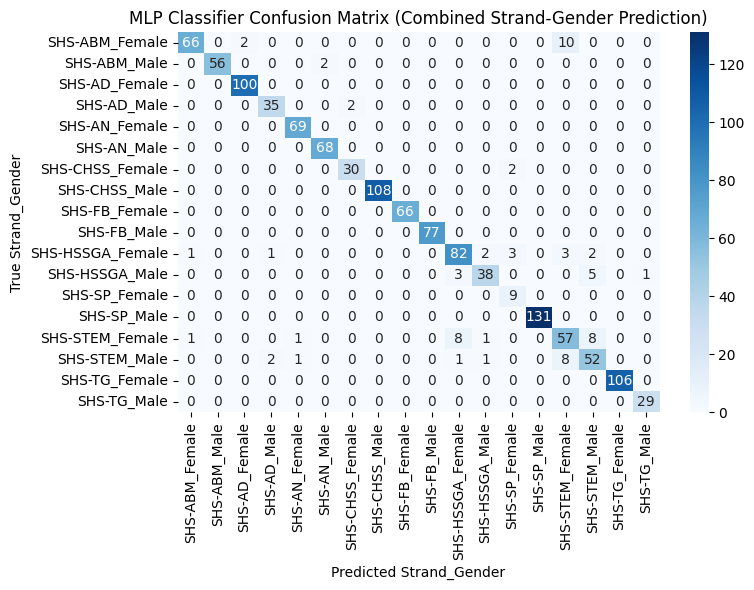


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[8,20], solver='lbfgs',activation='relu',max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


## MLP OPTIMIZER - BEST MODEL ACROSS ALL HYPERPARAMETERS TESTED - 'tahn' ,'SGD'- Experiment 37

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and be

Probability Results:  [[1.68719096e-01 2.05336562e-02 4.71261968e-01 7.61161596e-02
  5.04481666e-05 1.51144665e-05 1.51596911e-01 8.10839575e-04
  1.44432341e-03 4.85037505e-02 2.27746117e-03 4.17132198e-04
  1.33394352e-02 1.28063401e-03 2.77819674e-02 1.43306295e-02
  8.14538174e-04 7.05936107e-04]]
Prediction Results:  ['SHS-AD_Female' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9712

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       1.00      0.91      0.95        78
    SHS-ABM_Male       0.97      0.98      0.97        58
   SHS-AD_Female       0.91      1.00      0.95       100
     SHS-AD_Male       1.00      0.95      0.97        37
   SHS-AN_Female       1.00      1.00      1.00        69
     SHS-AN_Male       1.00      1.00      1.00        68
 SHS-CHSS_Female       1.00      1.00      1.00        32
   SHS-CHSS_Male       1.00      1.00      1.00   

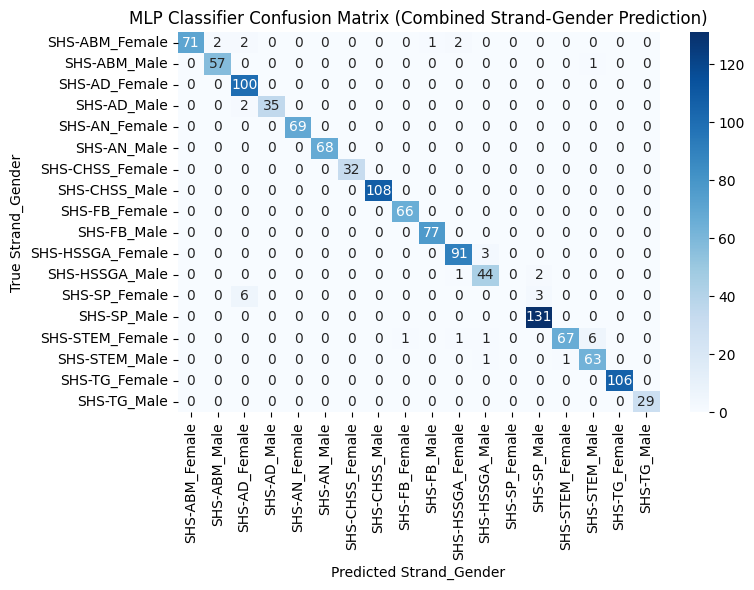


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[5], activation = 'tanh', solver='sgd', max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


## MLP OTIMIZER - BEST MODEL 'tanh' , 'ADAM - Experiment 48

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[5.00632696e-04 2.26340400e-04 2.40225101e-05 1.14916499e-05
  3.36528452e-05 5.10254100e-08 9.24135983e-04 9.15482126e-05
  6.63495361e-01 1.21914277e-02 6.07358456e-04 2.35356076e-04
  1.94584055e-05 7.91309095e-04 7.96262691e-03 3.11427945e-01
  1.17055993e-03 2.86721492e-04]]
Prediction Results:  ['SHS-FB_Female' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9424

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.91      0.90      0.90        78
    SHS-ABM_Male       0.95      0.97      0.96        58
   SHS-AD_Female       0.98      1.00      0.99       100
     SHS-AD_Male       1.00      0.95      0.97        37
   SHS-AN_Female       0.97      1.00      0.99        69
     SHS-AN_Male       1.00      1.00      1.00        68
 SHS-CHSS_Female       

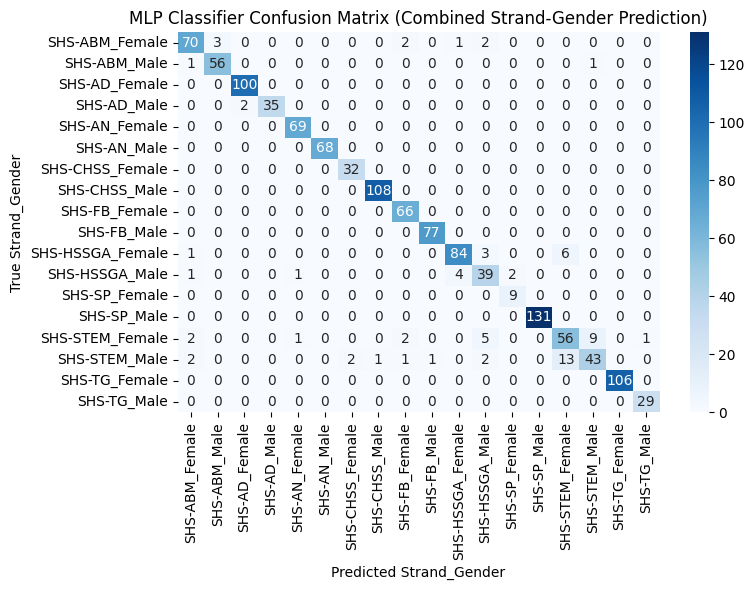


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[5,8,12], activation = 'tanh', solver='adam', max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


## MLP LEARNING RATE - BEST SGD MODEL  - EXPERIMENT 56


Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[6.08407273e-02 6.10042730e-10 1.42685050e-03 1.24097811e-13
  9.55480766e-09 3.82671435e-17 5.48649791e-13 1.30106991e-11
  1.12896695e-15 8.00036676e-22 3.42581243e-03 6.73580353e-18
  4.01589342e-18 5.64133132e-18 8.64061613e-05 9.34220193e-01
  8.87758476e-15 1.08673775e-15]]
Prediction Results:  ['SHS-STEM_Male' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9536

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.92      0.92      0.92        78
    SHS-ABM_Male       0.92      0.98      0.95        58
   SHS-AD_Female       0.97      1.00      0.99       100
     SHS-AD_Male       1.00      1.00      1.00        37
   SHS-AN_Female       0.97      1.00      0.99        69
     SHS-AN_Male       1.00      1.00      1.00        68
 SHS-CHSS_Female       

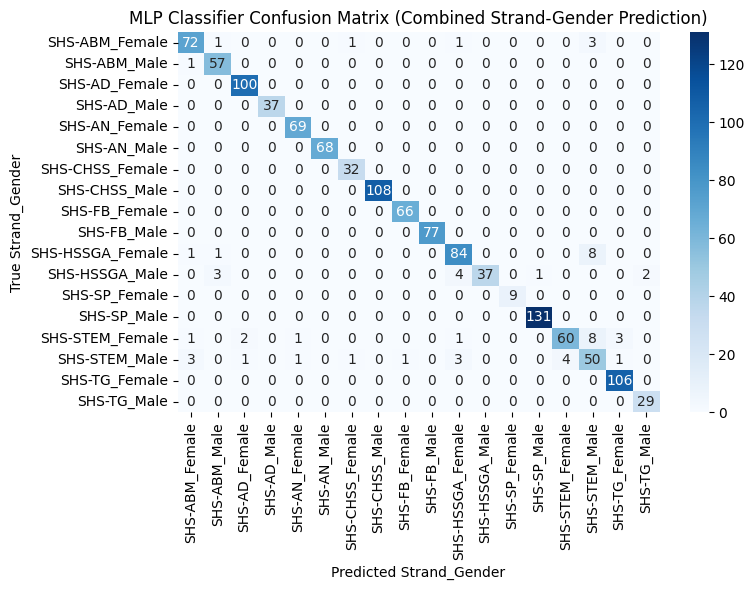


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[10,15], activation = 'relu', solver='sgd', learning_rate_init=.01, max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


## MLP LEARNING RATE - BEST ADAM MODEL EXPERIMENT 55

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[1.64229733e-05 5.35426430e-04 1.25518570e-05 4.21059159e-05
  2.06143119e-05 3.15154005e-07 1.35086924e-09 7.18859801e-10
  4.22787519e-06 8.88085230e-05 1.78713164e-06 1.39483981e-06
  8.67038136e-05 2.87138522e-05 1.07551374e-02 9.88377103e-01
  2.84310816e-05 2.53862486e-07]]
Prediction Results:  ['SHS-STEM_Male' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.92

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.89      0.73      0.80        78
    SHS-ABM_Male       0.76      0.90      0.83        58
   SHS-AD_Female       0.99      0.99      0.99       100
     SHS-AD_Male       0.94      0.89      0.92        37
   SHS-AN_Female       1.00      1.00      1.00        69
     SHS-AN_Male       1.00      1.00      1.00        68
 SHS-CHSS_Female       1.

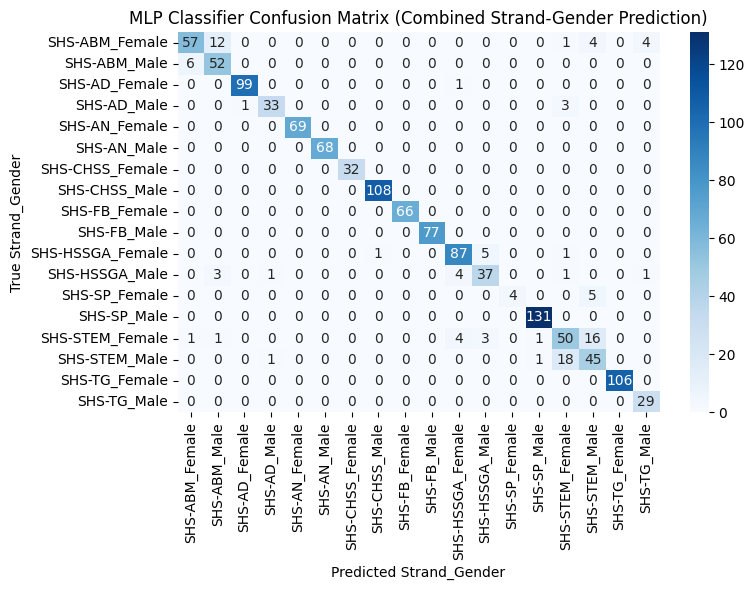


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[5,10], activation = 'tanh', solver='adam', learning_rate_init=.01, max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


## MLP BATCH SIZE MODEL - EXPERIMENTATION 81

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[4.74371831e-03 9.78051684e-01 3.70057172e-08 1.48324433e-05
  2.76616833e-04 2.28734611e-05 4.38640454e-03 1.03897886e-04
  3.21889817e-06 1.52555199e-07 8.29886408e-05 1.54681197e-05
  2.47112396e-03 6.72038994e-03 1.33160528e-05 3.06911742e-03
  1.89369846e-05 5.22248649e-06]]
Prediction Results:  ['SHS-ABM_Male' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9648

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.99      0.91      0.95        78
    SHS-ABM_Male       0.93      0.97      0.95        58
   SHS-AD_Female       0.98      1.00      0.99       100
     SHS-AD_Male       1.00      1.00      1.00        37
   SHS-AN_Female       1.00      1.00      1.00        69
     SHS-AN_Male       1.00      1.00      1.00        68
 SHS-CHSS_Female       1

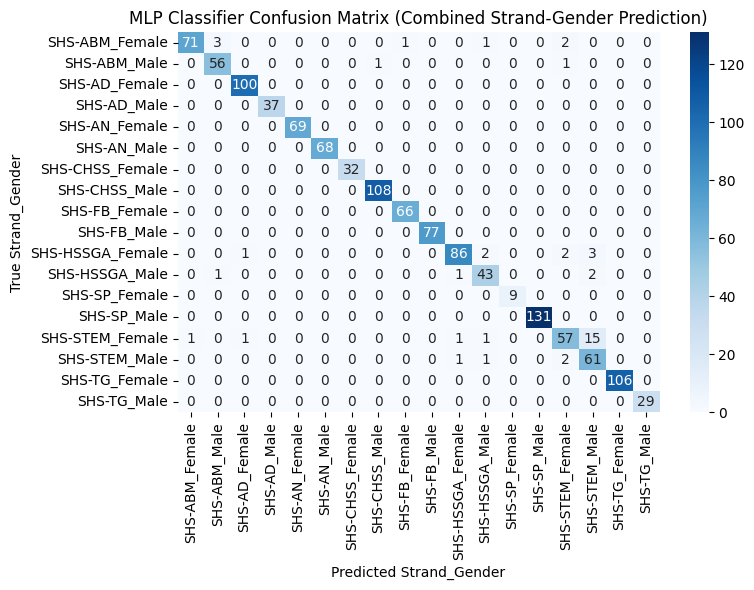


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[20,25], activation = 'tanh', solver='adam', learning_rate_init=.01, batch_size=32,max_iter=1000, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")


## MLP  EPOCH - BEST MODEL EXPERIMENTATION 99

Non-numeric columns: Index(['section', 'birthdate', 'dateenrolled'], dtype='object')
Probability Results:  [[9.99234883e-01 2.05742514e-05 1.94259680e-16 2.02529073e-13
  7.29454481e-10 6.66219692e-19 2.98332014e-15 3.50373586e-19
  1.74611612e-04 1.44495656e-10 5.66064422e-04 5.76930117e-07
  3.17137025e-06 1.43713625e-12 1.16875312e-07 2.95319371e-10
  8.48505823e-17 7.52116689e-18]]
Prediction Results:  ['SHS-ABM_Female' 'SHS-SP_Male' 'SHS-AN_Male' 'SHS-FB_Male' 'SHS-AN_Male']
Overall Accuracy:  0.9648

Classification Report (Combined Strand-Gender Prediction):
                  precision    recall  f1-score   support

  SHS-ABM_Female       0.97      0.90      0.93        78
    SHS-ABM_Male       0.98      0.95      0.96        58
   SHS-AD_Female       0.98      1.00      0.99       100
     SHS-AD_Male       0.97      0.95      0.96        37
   SHS-AN_Female       0.99      1.00      0.99        69
     SHS-AN_Male       1.00      1.00      1.00        68
 SHS-CHSS_Female      

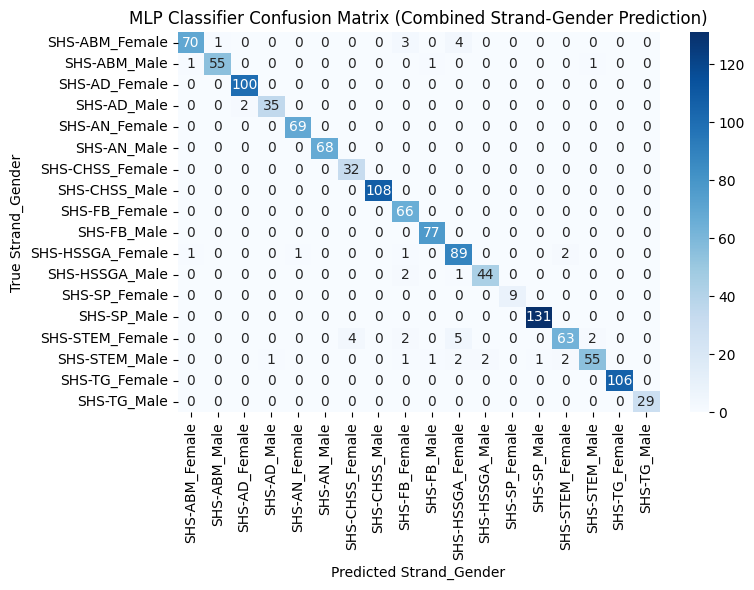


Number of Male and Female for each Strand:
Strand: SHS-ABM | Male: 233 | Female: 311
Strand: SHS-AD | Male: 148 | Female: 402
Strand: SHS-AN | Male: 271 | Female: 275
Strand: SHS-CHSS | Male: 433 | Female: 129
Strand: SHS-FB | Male: 306 | Female: 263
Strand: SHS-HSSGA | Male: 187 | Female: 375
Strand: SHS-SP | Male: 524 | Female: 36
Strand: SHS-STEM | Male: 259 | Female: 305
Strand: SHS-TG | Male: 117 | Female: 426


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('SHS_JRU_DATASET_24-25_clean.csv')

# Clean the gender column (optional, if needed)
df['gender'] = df['gender'].str.strip().str.capitalize()

# Create the combined 'strand_gender' label
df['strand_gender'] = df['strand'] + "_" + df['gender']

# Define features and target variable
X = df.drop(columns=['strand', 'gender', 'strand_gender'])  # Features
y = df['strand_gender']  # Combined target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

# One-Hot Encode non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols)

# Split the dataset into training and testing sets (for combined prediction)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP Classifier
nnclf = MLPClassifier(hidden_layer_sizes=[5], activation = 'relu', solver='sgd', learning_rate_init=.01, batch_size=128,max_iter=500, random_state=0)

# Fit the model for combined strand and gender prediction
nnclf.fit(X_train, y_train)

# Make predictions
prob = nnclf.predict_proba(X_test[:1])  # Probability for the first test sample
print("Probability Results: ", prob)

pred = nnclf.predict(X_test[:5])  # Predictions for the first five test samples
print("Prediction Results: ", pred)

# Evaluate the model (Combined Strand-Gender Prediction)
train_acc = nnclf.score(X_train, y_train)
test_acc = nnclf.score(X_test, y_test)
f1 = f1_score(y_test, nnclf.predict(X_test), average='weighted')
# Overall Accuracy
score = nnclf.score(X_test, y_test)
print("Overall Accuracy: ", score)

# Classification report for combined Strand and Gender
y_pred = nnclf.predict(X_test)
print("\nClassification Report (Combined Strand-Gender Prediction):")
print(classification_report(y_test, y_pred))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Weighted Avg F1 Score: {f1:.4f}")

# Confusion matrix for combined Strand and Gender
cm_combined = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Combined Strand-Gender):\n", cm_combined)

# Plot confusion matrix for Combined Strand and Gender
plt.figure(figsize=(8,6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('MLP Classifier Confusion Matrix (Combined Strand-Gender Prediction)')
plt.xlabel('Predicted Strand_Gender')
plt.ylabel('True Strand_Gender')
plt.tight_layout()
plt.show()

# Print the list of each strand and gender combinations
# Print the number of Female and Male students in each strand
print("\nNumber of Male and Female for each Strand:")
strand_gender_counts = df.groupby(['strand', 'gender']).size().unstack(fill_value=0)

# Display the counts in a readable format
for strand in strand_gender_counts.index:
    male_count = strand_gender_counts.loc[strand, 'Male']
    female_count = strand_gender_counts.loc[strand, 'Female']
    print(f"Strand: {strand} | Male: {male_count} | Female: {female_count}")
